# Practical example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptiva statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Dealing with missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the PDFs

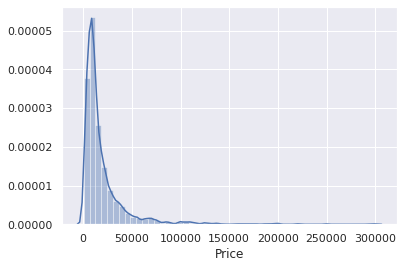

In [8]:
sns.distplot(data_no_mv['Price'])

## Dealing with outliers

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


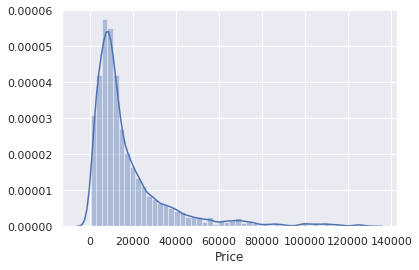

In [10]:
sns.distplot(data_1['Price'])

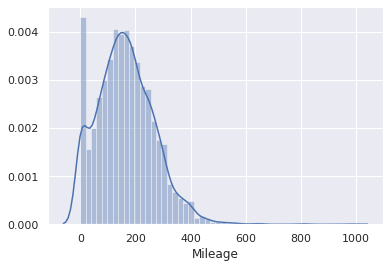

In [11]:
sns.distplot(data_1['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

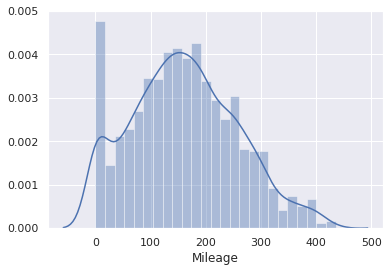

In [13]:
sns.distplot(data_2['Mileage'])

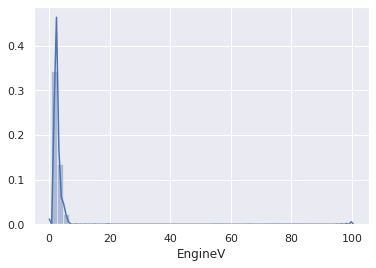

In [14]:
sns.distplot(data_2['EngineV'])

In [15]:
data_3 = data_2[data_2['EngineV'] <= 6.5]

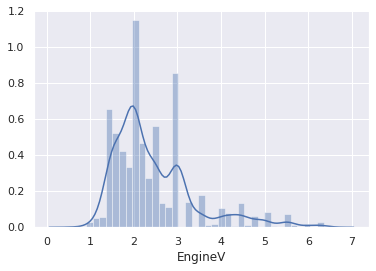

In [16]:
sns.distplot(data_3['EngineV'])

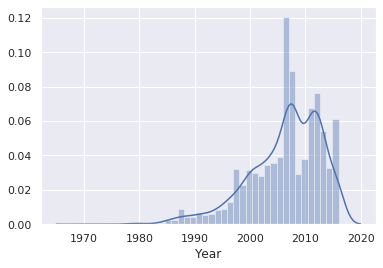

In [17]:
sns.distplot(data_3['Year'])

In [18]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

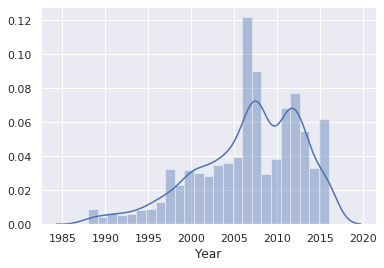

In [19]:
sns.distplot(data_4['Year'])

In [20]:
data_cleaned = data_4.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.000000,3868,3868.000000,3868.000000,3868,3868,3868.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.929708,NaN,160.542399,2.451487,NaN,NaN,2006.710186
std,NaN,19085.415722,NaN,95.620925,0.951474,NaN,NaN,6.103116
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

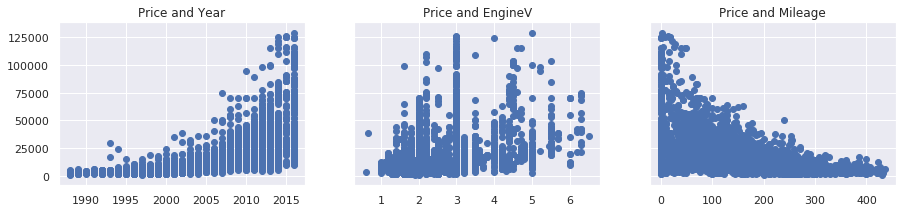

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

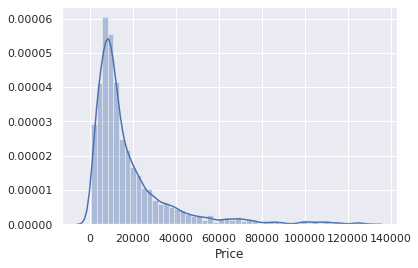

In [23]:
sns.distplot(data_cleaned['Price'])

## Relaxing the assumptions

In [24]:
log_price = np.log(data_cleaned.Price)
data_cleaned['log_price'] = log_price

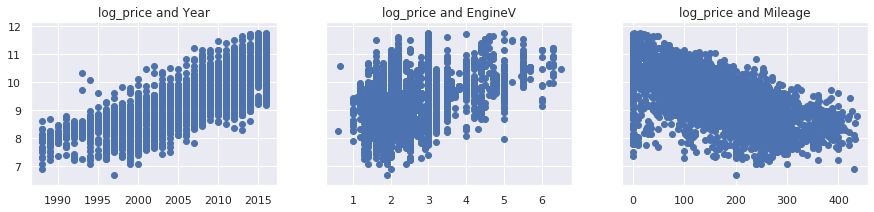

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

In [26]:
data_cleaned.drop(['Price'], inplace=True, axis=1)

## Multicolinearity

In [27]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [29]:
vif

,VIF,features
0,3.792300,Mileage
1,10.332226,Year
2,7.638286,EngineV


VIF ε [1, +inf)  
VIF = 1: no multicollinearity  
1 < VIF < 5: perfectly okay  
10 < VIF: unacceptable

In [30]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Create dummy variables

In [31]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [32]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rearrange a bit

In [33]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols = [ 'log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [36]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [40]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_hat = reg.predict(x_train)

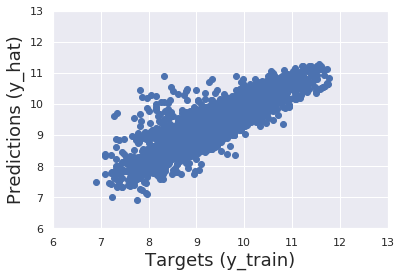

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

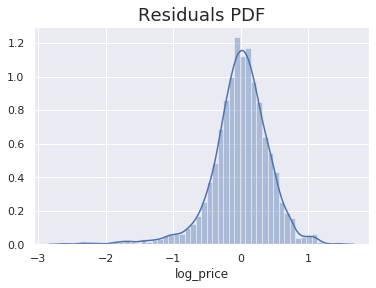

In [43]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [44]:
reg.score(x_train,y_train)

0.7583866949948946

## Finding the weights and bias

In [45]:
reg.coef_

array([-0.45831235,  0.21216834,  0.01266665,  0.01260123, -0.14001857,
       -0.18336064, -0.06485382, -0.09380217, -0.14413603, -0.09901954,
       -0.19434177, -0.12129436, -0.16354206, -0.12097883, -0.0312541 ,
       -0.15098459,  0.31987238])

In [46]:
reg.intercept_

9.42000975196255

In [47]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458312
1,EngineV,0.212168
2,Brand_BMW,0.012667
3,Brand_Mercedes-Benz,0.012601
4,Brand_Mitsubishi,-0.140019
5,Brand_Renault,-0.183361
6,Brand_Toyota,-0.064854
7,Brand_Volkswagen,-0.093802
8,Body_hatch,-0.144136
9,Body_other,-0.099020


In [48]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing

In [50]:
y_hat_test = reg.predict(x_test)

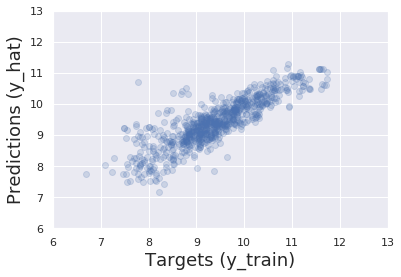

In [53]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [54]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10697.793775
1,24093.437241
2,7535.144896
3,37079.226494
4,11388.000883


In [57]:
df_pf['Target'] = np.exp(y_test.reset_index(drop=True))
df_pf

,Prediction,Target
0,10697.793775,2300.0
1,24093.437241,22500.0
2,7535.144896,2500.0
3,37079.226494,54000.0
4,11388.000883,9150.0
...,...,...
769,29676.632297,29500.0
770,10084.914771,1800.0
771,10870.149564,14700.0
772,27846.661179,68500.0


In [58]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [61]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10697.793775,2300.0,-8397.793775,365.121468
1,24093.437241,22500.0,-1593.437241,7.081943
2,7535.144896,2500.0,-5035.144896,201.405796
3,37079.226494,54000.0,16920.773506,31.334766
4,11388.000883,9150.0,-2238.000883,24.459026
...,...,...,...,...
769,29676.632297,29500.0,-176.632297,0.598754
770,10084.914771,1800.0,-8284.914771,460.273043
771,10870.149564,14700.0,3829.850436,26.053404
772,27846.661179,68500.0,40653.338821,59.347940


In [62]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15807.145033,17593.980375,1786.835342,41.871280
std,12475.279463,18933.622365,10817.296888,87.038773
min,1295.979637,800.000000,-42022.517532,0.000788
25%,7569.590343,6900.000000,-2232.067327,12.142943
50%,11769.995198,11249.500000,119.098772,25.022805
75%,19930.646261,20500.000000,3168.536310,41.792289
max,78769.296407,124000.000000,80944.659722,1750.938230


In [65]:
pd.options.display.max_rows = 999

df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
252,9899.921978,9900.00,0.078022,0.000788
518,4200.859877,4200.00,-0.859877,0.020473
308,8903.039701,8900.00,-3.039701,0.034154
72,4002.736685,4000.00,-2.736685,0.068417
512,32545.427249,32500.00,-45.427249,0.139776
648,21259.363552,21335.00,75.636448,0.354518
723,6074.861286,6100.00,25.138714,0.412110
549,3734.107738,3750.00,15.892262,0.423794
259,6169.625806,6200.00,30.374194,0.489906
769,29676.632297,29500.00,-176.632297,0.598754
